In [58]:
%pylab inline
import seaborn as sns
import pandas as pd
import time
import scipy

# still working on this
# from mpl_toolkits.basemap import Basemap

sns.set_style('white')
pd.set_option('display.max_columns', 35)

Populating the interactive namespace from numpy and matplotlib


# Reading in Data

In [2]:
print "Starting to read in data..."
t1 = time.time()
requests = pd.read_csv('311__Service_Requests.csv', parse_dates=True)
t2 = time.time()
print "Read in data in %.2f seconds." % (t2 - t1)

Starting to read in data...
Read in data in 7.18 seconds.


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# processing on the data types
print "Starting to process data types..."
t1 = time.time()
for col in ['OPEN_DT', 'TARGET_DT', 'CLOSED_DT']:
    requests[col] = pd.to_datetime(requests[col], infer_datetime_format=True)
t2= time.time()
print "Dates processed in %.2f seconds." % (t2-t1)


Starting to process data types...
Dates processed in 269.48 seconds.


In [5]:
requests.describe()

,CASE_ENQUIRY_ID,fire_district,city_council_district,neighborhood_services_district,LOCATION_ZIPCODE,Property_ID,LATITUDE,LONGITUDE
count,7.414790e+05,705302.000000,708094.000000,708093.000000,569199.000000,708248.000000,741479.000000,741479.000000
mean,1.010010e+11,7.245801,4.675104,8.972152,2127.478086,100775.067798,42.324841,-71.085479
std,4.359690e+05,3.280281,2.550621,4.172519,17.785509,95373.252851,0.035126,0.036447
min,1.010003e+11,1.000000,0.000000,0.000000,2026.000000,1.000000,42.232100,-71.185400
25%,1.010007e+11,4.000000,2.000000,6.000000,2121.000000,16592.750000,42.293800,-71.111700
50%,1.010011e+11,7.000000,5.000000,10.000000,2126.000000,82519.000000,42.331400,-71.075900
75%,1.010014e+11,9.000000,7.000000,13.000000,2131.000000,145504.000000,42.355800,-71.058700
max,1.010018e+11,12.000000,9.000000,15.000000,2467.000000,419841.000000,42.395200,-70.994900


In [6]:
requests.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,TYPE,QUEUE,Department,SubmittedPhoto,ClosedPhoto,Location,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
0,101000295613,2011-07-01 01:32:33,2011-07-15 01:32:32,2011-07-01 05:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,NaN,NaN,INTERSECTION of Groveland St & River St Matta...,8,07,3,B3,Greater Mattapan,7,Ward 17,1714,NaN,INTERSECTION Groveland St & River St,NaN,Intersection,5512,42.2715,-71.0772,Employee Generated,"(42.2715, -71.0772)"
1,101000295614,2011-07-01 02:18:31,2011-07-05 02:18:31,2011-07-01 06:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,NaN,NaN,39 Lorraine St Roslindale MA 02131,12,06,5,E5,Roslindale,10,Ward 20,2008,R1,39 Lorraine St,2131,Address,87461,42.2839,-71.1447,Self Service,"(42.2839, -71.1447)"
2,101000295615,2011-07-01 02:28:04,2011-08-15 02:28:04,2011-08-01 15:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,NaN,NaN,INTERSECTION of Corey St & Lagrange St West R...,NaN,06,6,E5,West Roxbury,12,Ward 20,2017,NaN,INTERSECTION Corey St & Lagrange St,NaN,Intersection,3522,42.3003,-71.1698,Self Service,"(42.3003, -71.1698)"
3,101000295616,2011-07-01 03:03:48,2011-07-15 03:03:48,2011-07-22 16:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,NaN,NaN,235 Fairmount Ave Hyde Park MA 02136,12,08,5,E18,Hyde Park,10,Ward 18,1816,R2,235 Fairmount Ave,2136,Address,55708,42.2496,-71.1156,Self Service,"(42.2496, -71.1156)"
4,101000295617,2011-07-01 03:12:31,NaT,2011-07-01 06:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,NaN,NaN,INTERSECTION of Dorchester Ave & Hallam St Do...,7,03,3,C11,Dorchester,7,Ward 13,1309,NaN,INTERSECTION Dorchester Ave & Hallam St,NaN,Intersection,4182,42.3144,-71.0569,Constituent Call,"(42.3144, -71.0569)"


In [7]:
requests.dtypes

CASE_ENQUIRY_ID                            int64
OPEN_DT                           datetime64[ns]
TARGET_DT                         datetime64[ns]
CLOSED_DT                         datetime64[ns]
OnTime_Status                             object
CASE_STATUS                               object
CLOSURE_REASON                            object
CASE_TITLE                                object
SUBJECT                                   object
REASON                                    object
TYPE                                      object
QUEUE                                     object
Department                                object
SubmittedPhoto                            object
ClosedPhoto                               object
Location                                  object
fire_district                            float64
pwd_district                              object
city_council_district                    float64
police_district                           object
neighborhood        

In [8]:
closed_requests = requests[requests['CASE_STATUS'] == 'Closed']
open_requests = requests[requests['CASE_STATUS'] == 'Open']
print "There are %i open and %i closed requests." % (len(open_requests), len(closed_requests))

There are 58494 open and 682985 closed requests.


In [ ]:
plt.hist(closed_requests[closed_requests['REASON'] = 'Street Lights'])

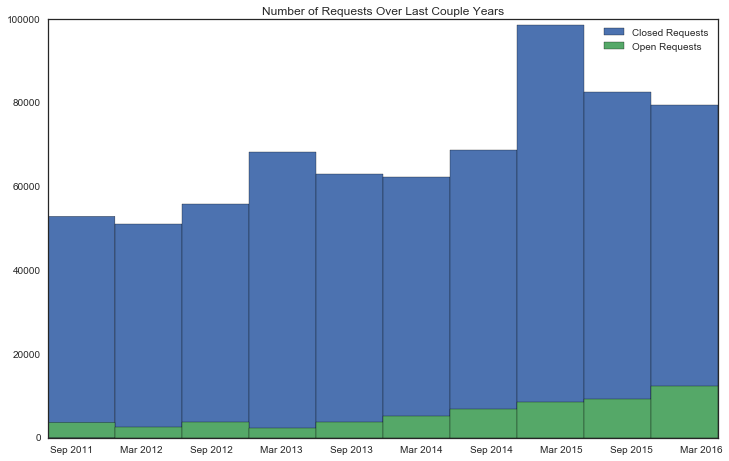

In [9]:
plt.figure(figsize=[12,7.5])
plt.title("Number of Requests Over Last Couple Years")
plt.hist(closed_requests['OPEN_DT'].values, label='Closed Requests')
plt.hist(open_requests['OPEN_DT'].values, label='Open Requests')
plt.legend()

(array([ 602861.,   28199.,   11614.,    7270.,    5486.,    4018.,
           3186.,    2991.,    2330.,    2161.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

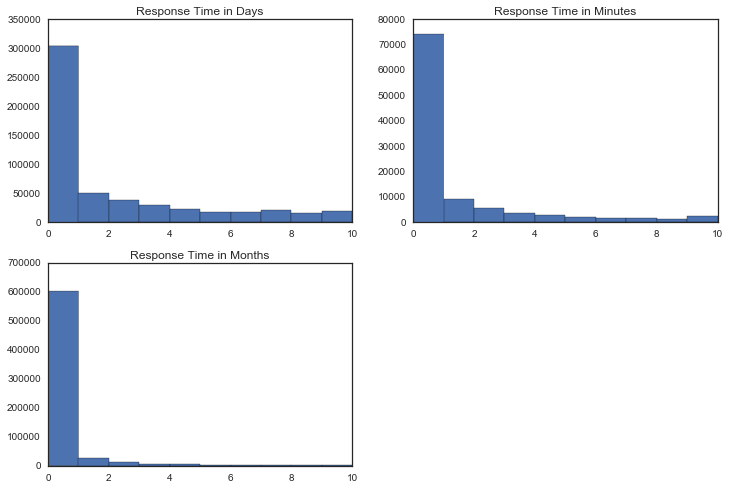

In [10]:
plt.figure(figsize=[12,8])
plt.subplot(221)
plt.title('Response Time in Days')
delays = closed_requests['CLOSED_DT'] - closed_requests['OPEN_DT']
plt.hist(delays.astype('timedelta64[D]'), range=(0,10))
plt.subplot(222)
plt.title('Response Time in Minutes')
plt.hist(delays.astype('timedelta64[m]'), range=(0,10))
plt.subplot(223)
plt.title("Response Time in Months")
plt.hist(delays.astype('timedelta64[D]')/31, range=(0,10))

1433


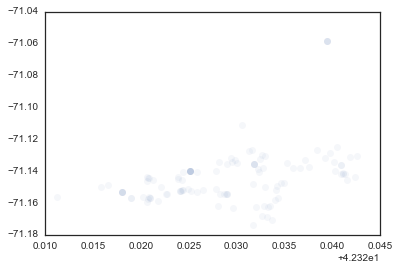

In [248]:
begin = pd.to_datetime('March 15, 2014 12:00PM')
end = pd.to_datetime('March 19, 2014 12:00PM')

in_range = requests[requests['OPEN_DT'] > begin]
in_range = in_range[in_range['OPEN_DT'] < end]

print len(in_range)

neighborhood = in_range[in_range['neighborhood'] == 'Allston / Brighton']

plt.plot(neighborhood['LATITUDE'], neighborhood['LONGITUDE'], 'o', alpha=.05)

In [246]:
set(in_range['neighborhood'])

{nan,
 'Allston / Brighton',
 'Back Bay',
 'Beacon Hill',
 'Boston',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'Downtown / Financial District',
 'East Boston',
 'Fenway / Kenmore / Audubon Circle / Longwood',
 'Greater Mattapan',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Mission Hill',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston / South Boston Waterfront',
 'South End',
 'West Roxbury'}

# Simulated Annealing

In [234]:
# Starting the set-up

epsilon = 10**-6

def jump(current):
    new_current = []
    for dist in current:
        new_dist = {}
        new_dist['means'] = dist['means'] + np.random.normal(loc=0, scale=0.001, size=2)
        covs = dist['cov'] + np.random.normal(loc=0, scale=0.001, size=[2,2])
        covs = (covs + covs.T)/2
        if covs[0,0] <= 0: covs[0,0] = epsilon
        if covs[1,1] <= 0: covs[1,1] = epsilon
            
        max_cov = (covs[0,0] * covs[1,1])**0.5
        if abs(covs[0,1]) > max_cov:
            if covs[0,1] < 0:
                covs[0,1] = -max_cov+epsilon
                covs[1,0] = -max_cov + epsilon
            else:
                covs[0,1] = max_cov-epsilon
                covs[1,0] = max_cov - epsilon
                
        new_dist['cov'] = covs
        new_current.append(new_dist)
    
    return new_current
    
# Getting the liklihood estimate, we assume that for most
# points, they will be sufficiently far 
def get_value(current):
    all_likls = []
    for row in dat:
        likls = []
        for dist in current:
            likls.append(scipy.stats.multivariate_normal.logpdf(row, mean=dist['means'], cov=dist['cov']))
        all_likls.append(max(likls))
    return len(dat)-sum(all_likls)

In [235]:
# bogus data for testing
# dat = np.random.multivariate_normal([42, -17.5], cov=[[1,.1], [.1,1]], size=100)

# the real data
dat = in_range[['LONGITUDE', 'LATITUDE']].as_matrix()

# making it shorter for testing
dat = dat[:1000]

In [236]:
# initialize the simulated annealing variables
    
temp = 0.1
current = [{'means': np.array([-71.08,  42.33]), 'cov':np.array([[.05, .005], [.005, .05]])},
           {'means': np.array([-71.08,  42.33]), 'cov':np.array([[.05, .005], [.005, .05]])}]

bestI = [0]
contents = [current[:]]
values = [get_value(current)]

In [237]:
temp =  0.1
print "Starting temperature: %.5f" % temp
for i in range(1000):
    suggested = jump(current)
    suggested_val = get_value(suggested)

    if suggested_val <= values[-1] or np.random.uniform() < (1.0*values[-1] / suggested_val)**(1.0/temp):
        if i % 500 == 0:
            temp *= 97./100.
        contents.append(suggested)
        values.append(suggested_val)
        if suggested_val < values[bestI[-1]]:
            bestI.append(len(values)-1)
        current = suggested

Starting temperature: 0.10000


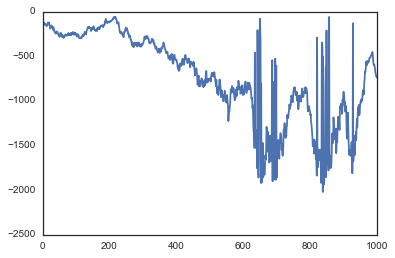

In [238]:
plt.plot(values)

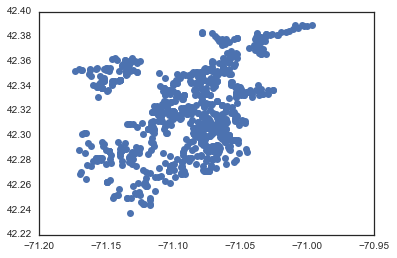

In [221]:
plt.plot(dat[:,0], dat[:,1], 'o')

In [216]:
contents[bestI[-1]]

[{'cov': array([[ 0.02909293,  0.01673209],
         [ 0.01673209,  0.08006892]]),
  'means': array([-71.03791974,  42.29002191])},
 {'cov': array([[ 0.05943693,  0.02213621],
         [ 0.02213621,  0.00882164]]),
  'means': array([-71.09126642,  42.31716597])}]

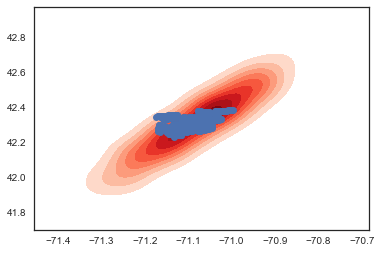

In [241]:
best = contents[bestI[-1]]
norm1 = np.random.multivariate_normal(mean=best[0]['means'], cov=best[0]['cov'], size=200)
norm2 = np.random.multivariate_normal(mean=best[1]['means'], cov=best[1]['cov'], size=200)

#ax = sns.kdeplot(norm2[:,0], norm2[:,1],
#                cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(norm1[:,0], norm1[:,1],
                 cmap="Reds", shade=True, shade_lowest=False)
plt.plot(dat[:,0], dat[:,1], 'o')

In [174]:
np.mean(dat, axis=0)

array([-71.085662,  42.334048])

In [210]:
print np.std(dat[:,0])
print np.std(dat[:,1])

0.0349181780166
0.0280449014261
